In [1]:
import pandas as pd
import numpy as np

In [2]:
# importing data set from aemo.com.au/energy-systems/electricity/national-electricity-market-nem/data-nem
df = pd.read_csv('../csv/PRICE_AND_DEMAND_202301_NSW1.csv')
df.head()

,REGION,SETTLEMENTDATE,TOTALDEMAND,RRP,PERIODTYPE
0,NSW1,2023/01/01 00:05:00,6906.63,140.40,TRADE
1,NSW1,2023/01/01 00:10:00,6854.28,133.96,TRADE
2,NSW1,2023/01/01 00:15:00,6856.32,120.00,TRADE
3,NSW1,2023/01/01 00:20:00,6796.27,118.99,TRADE
4,NSW1,2023/01/01 00:25:00,6805.55,118.99,TRADE


In [4]:
df.dtypes

REGION             object
SETTLEMENTDATE     object
TOTALDEMAND       float64
RRP               float64
PERIODTYPE         object
dtype: object

In [5]:
df['Date_Time'] = pd.to_datetime(df['SETTLEMENTDATE'], dayfirst=True)
df['Day'] = df['Date_Time'].dt.day
df['Month'] = df['Date_Time'].dt.month
df['Year'] = df['Date_Time'].dt.year
df['Hour'] = df['Date_Time'].dt.hour
df['Minute'] = df['Date_Time'].dt.minute
df

,REGION,SETTLEMENTDATE,TOTALDEMAND,RRP,PERIODTYPE,Date_Time,Day,Month,Year,Hour,Minute
0,NSW1,2023/01/01 00:05:00,6906.63,140.40,TRADE,2023-01-01 00:05:00,1,1,2023,0,5
1,NSW1,2023/01/01 00:10:00,6854.28,133.96,TRADE,2023-01-01 00:10:00,1,1,2023,0,10
2,NSW1,2023/01/01 00:15:00,6856.32,120.00,TRADE,2023-01-01 00:15:00,1,1,2023,0,15
3,NSW1,2023/01/01 00:20:00,6796.27,118.99,TRADE,2023-01-01 00:20:00,1,1,2023,0,20
4,NSW1,2023/01/01 00:25:00,6805.55,118.99,TRADE,2023-01-01 00:25:00,1,1,2023,0,25
...,...,...,...,...,...,...,...,...,...,...,...
8923,NSW1,2023/01/31 23:40:00,7368.45,125.66,TRADE,2023-01-31 23:40:00,31,1,2023,23,40
8924,NSW1,2023/01/31 23:45:00,7306.86,120.06,TRADE,2023-01-31 23:45:00,31,1,2023,23,45
8925,NSW1,2023/01/31 23:50:00,7281.33,120.06,TRADE,2023-01-31 23:50:00,31,1,2023,23,50
8926,NSW1,2023/01/31 23:55:00,7300.71,120.06,TRADE,2023-01-31 23:55:00,31,1,2023,23,55


In [6]:
df.dtypes

REGION                    object
SETTLEMENTDATE            object
TOTALDEMAND              float64
RRP                      float64
PERIODTYPE                object
Date_Time         datetime64[ns]
Day                        int64
Month                      int64
Year                       int64
Hour                       int64
Minute                     int64
dtype: object

In [7]:
# Converting to numerics Reference: pandas.pydate.org/pandas-docs/stable/reference/api/pandas.to_numeric.html
df['Demand'] = pd.to_numeric(df['TOTALDEMAND'], errors='coerce')
df['Price'] = pd.to_numeric(df['RRP'], errors='coerce')

In [9]:
df.drop(['TOTALDEMAND', 'REGION', 'SETTLEMENTDATE', 'RRP', 'PERIODTYPE', 'Date_Time'], axis=1, inplace=True)
df

,Day,Month,Year,Hour,Minute,Demand,Price
0,1,1,2023,0,5,6906.63,140.40
1,1,1,2023,0,10,6854.28,133.96
2,1,1,2023,0,15,6856.32,120.00
3,1,1,2023,0,20,6796.27,118.99
4,1,1,2023,0,25,6805.55,118.99
...,...,...,...,...,...,...,...
8923,31,1,2023,23,40,7368.45,125.66
8924,31,1,2023,23,45,7306.86,120.06
8925,31,1,2023,23,50,7281.33,120.06
8926,31,1,2023,23,55,7300.71,120.06


## Transform the Data

In [10]:
x0 = []
x1 = []
x2 = []
x3 = []
x4 = []
x5 = []
x6 = []
y = []

In [11]:
for i in range (0, df.shape[0]-48):
    x0.append(df.iloc[i:i + 48, 0])
    x1.append(df.iloc[i:i + 48, 1])
    x2.append(df.iloc[i:i + 48, 2])
    x3.append(df.iloc[i:i + 48, 3])
    x4.append(df.iloc[i:i + 48, 4])
    x5.append(df.iloc[i:i + 48, 5])
    x6.append(df.iloc[i:i + 48, 6])
    y.append(df.iloc[i + 48, 6])
    

In [12]:
type(x5)

list

In [13]:
df.head(20)

,Day,Month,Year,Hour,Minute,Demand,Price
0,1,1,2023,0,5,6906.63,140.40
1,1,1,2023,0,10,6854.28,133.96
2,1,1,2023,0,15,6856.32,120.00
3,1,1,2023,0,20,6796.27,118.99
4,1,1,2023,0,25,6805.55,118.99
5,1,1,2023,0,30,6739.32,107.55
6,1,1,2023,0,35,6712.64,118.99
7,1,1,2023,0,40,6704.01,117.02
8,1,1,2023,0,45,6682.31,109.50
9,1,1,2023,0,50,6655.04,110.12


In [14]:
x0, x1, x2, x3, x4, x5, x6, y = np.array(x0), np.array(x1), np.array(x2), np.array(x3), np.array(x4), np.array(x5), np.array(x6), np.array(y)

In [15]:
y.shape

(8880,)

In [16]:
y = np.reshape(y, (len(y), 1))
y.shape

(8880, 1)

In [17]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
x0 = scaler.fit_transform(x0)
x1 = scaler.fit_transform(x1)
x2 = scaler.fit_transform(x2)
x3 = scaler.fit_transform(x3)
x4 = scaler.fit_transform(x4)
x5 = scaler.fit_transform(x5)
x6 = scaler.fit_transform(x6)
y = scaler.fit_transform(y)

In [18]:
x5

array([[0.37304588, 0.36509578, 0.36540558, ..., 0.2167546 , 0.21750329,
        0.21908268],
       [0.36509578, 0.36540558, 0.35628612, ..., 0.21750329, 0.21908268,
        0.21220626],
       [0.36540558, 0.35628612, 0.35769543, ..., 0.21908268, 0.21220626,
        0.22493098],
       ...,
       [0.66393463, 0.66697647, 0.65258276, ..., 0.44306602, 0.44317992,
        0.43382659],
       [0.66697647, 0.65258276, 0.64663727, ..., 0.44317992, 0.43382659,
        0.42994949],
       [0.65258276, 0.64663727, 0.64593869, ..., 0.43382659, 0.42994949,
        0.43289262]])

In [19]:
x5.shape

(8880, 48)

In [20]:
X = np.stack([x0, x1, x2, x3, x4, x5, x6], axis=2)

In [21]:
X.shape

(8880, 48, 7)

## Build the LSTM Moded

In [22]:
X_train, X_test = X[:-480], X[-480:]
y_train, y_test = y[:-480], y[-480:]

In [23]:
X_train.shape[1], X_train.shape[2]

(48, 7)

In [24]:
# Importing keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from tensorflow.keras import optimizers

In [26]:
model = Sequential()
# set return requesnce = true, if we are going to have another LSTM Layer
model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(50, activation='relu'))
model.add(Dense(1))

In [28]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 48, 50)            11600     
                                                                 
 lstm_3 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 50)                2550      
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 34,401
Trainable params: 34,401
Non-trainable params: 0
_________________________________________________________________


In [30]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

filepath = 'models/{epoch:02d}-{loss:.4f}-{val_loss:.4f}-{mae:.4f}-{val_mae:.4f}.hdf5'

callbacks = [EarlyStopping(monitor='val_loss', patience=20),
             ModelCheckpoint(filepath, monitor='loss', save_best_only=True, mode='min')]

In [37]:
optimizers.SGD(momentum=0.9)
model.compile(optimizer='SGD', loss='mse', metrics=['mae'])

In [38]:
model.fit(X_train, y_train, validation_split=0.2, epochs=1000, callbacks=callbacks, batch_size=16)

Epoch 1/100
420/420 [==============================] - 64s 116ms/step - loss: 3.8498e-04 - mae: 0.0143 - val_loss: 9.0608e-04 - val_mae: 0.0151
Epoch 2/100
420/420 [==============================] - 30s 72ms/step - loss: 3.6620e-04 - mae: 0.0137 - val_loss: 9.0081e-04 - val_mae: 0.0147
Epoch 3/100
420/420 [==============================] - 41s 99ms/step - loss: 3.5248e-04 - mae: 0.0133 - val_loss: 8.9491e-04 - val_mae: 0.0145
Epoch 4/100
420/420 [==============================] - 42s 100ms/step - loss: 3.4200e-04 - mae: 0.0130 - val_loss: 8.9058e-04 - val_mae: 0.0143
Epoch 5/100
420/420 [==============================] - 34s 81ms/step - loss: 3.3370e-04 - mae: 0.0128 - val_loss: 8.8445e-04 - val_mae: 0.0142
Epoch 6/100
420/420 [==============================] - 33s 79ms/step - loss: 3.2625e-04 - mae: 0.0126 - val_loss: 8.9297e-04 - val_mae: 0.0142
Epoch 7/100
420/420 [==============================] - 28s 67ms/step - loss: 3.1962e-04 - mae: 0.0124 - val_loss: 8.8889e-04 - val_mae: 0.01

In [39]:
MSE, MAE = model.evaluate(X_test, y_test)
print(MSE, MAE)

15/15 [==============================] - 13s 41ms/step - loss: 2.4822e-04 - mae: 0.0117
0.0002482157724443823 0.011682985350489616


In [40]:
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)
predictions

15/15 [==============================] - 8s 22ms/step


array([[119.93175 ],
       [121.94498 ],
       [121.648155],
       [121.500725],
       [121.3842  ],
       [121.32103 ],
       [121.48083 ],
       [121.87213 ],
       [122.429214],
       [123.098526],
       [121.848145],
       [119.52136 ],
       [120.813675],
       [123.682556],
       [123.35791 ],
       [123.045166],
       [122.975685],
       [123.175735],
       [123.80277 ],
       [124.41832 ],
       [124.911026],
       [125.25636 ],
       [123.830055],
       [121.49178 ],
       [122.91991 ],
       [125.60056 ],
       [125.12815 ],
       [124.27485 ],
       [123.853775],
       [123.991135],
       [124.31584 ],
       [124.7269  ],
       [125.15476 ],
       [125.41093 ],
       [124.0541  ],
       [121.208405],
       [122.35395 ],
       [123.94887 ],
       [122.5913  ],
       [121.12931 ],
       [120.024414],
       [119.06058 ],
       [118.05749 ],
       [117.01052 ],
       [116.07    ],
       [115.23155 ],
       [114.52636 ],
       [111.1

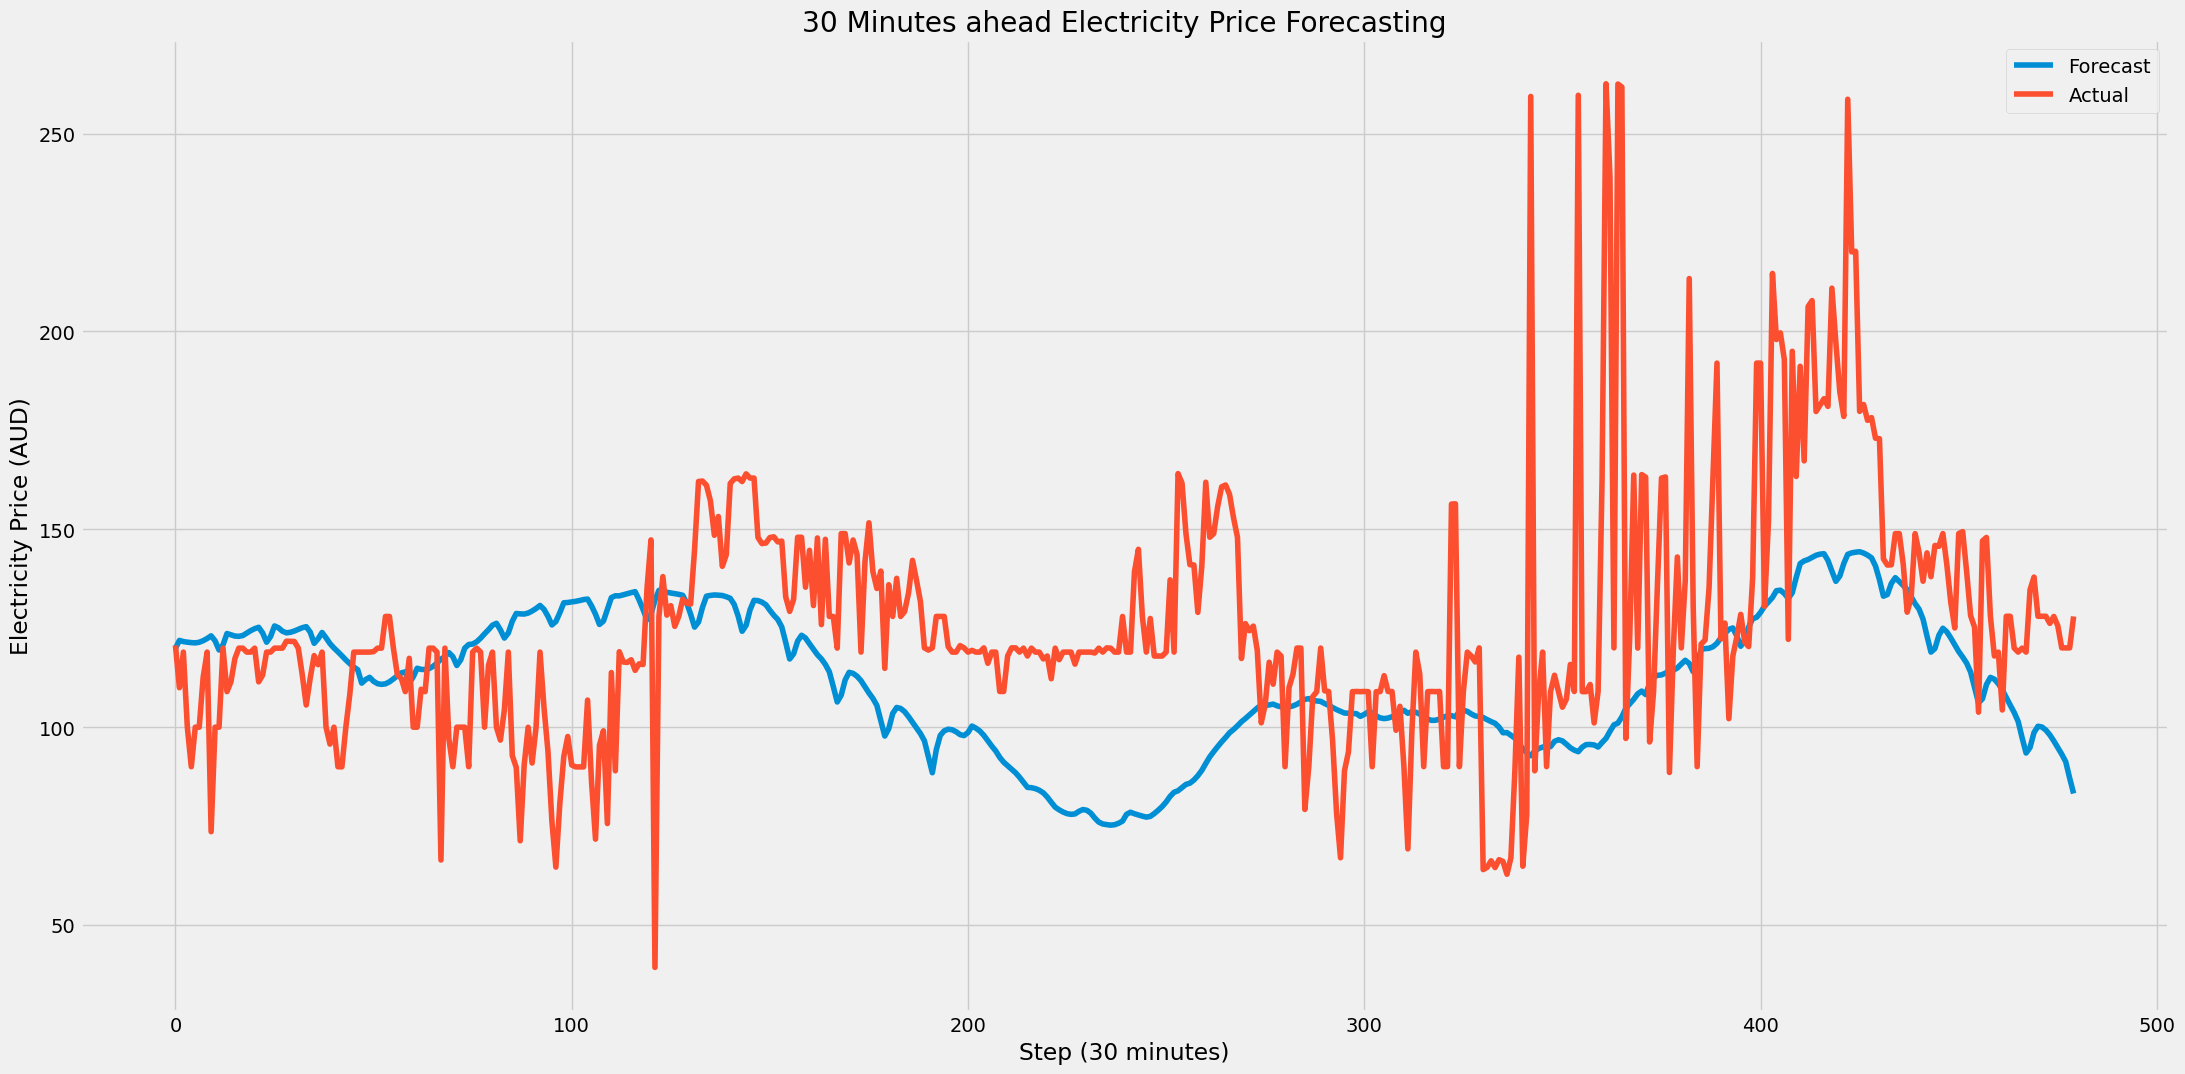

In [47]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
plt.figure(figsize=(24,12))
plt.title('30 Minutes ahead Electricity Price Forecasting')
plt.xlabel('Step (30 minutes)')
plt.ylabel('Electricity Price (AUD)')
plt.plot(predictions)
plt.plot(scaler.inverse_transform(y_test))
plt.legend(['Forecast', 'Actual'])
plt.show()

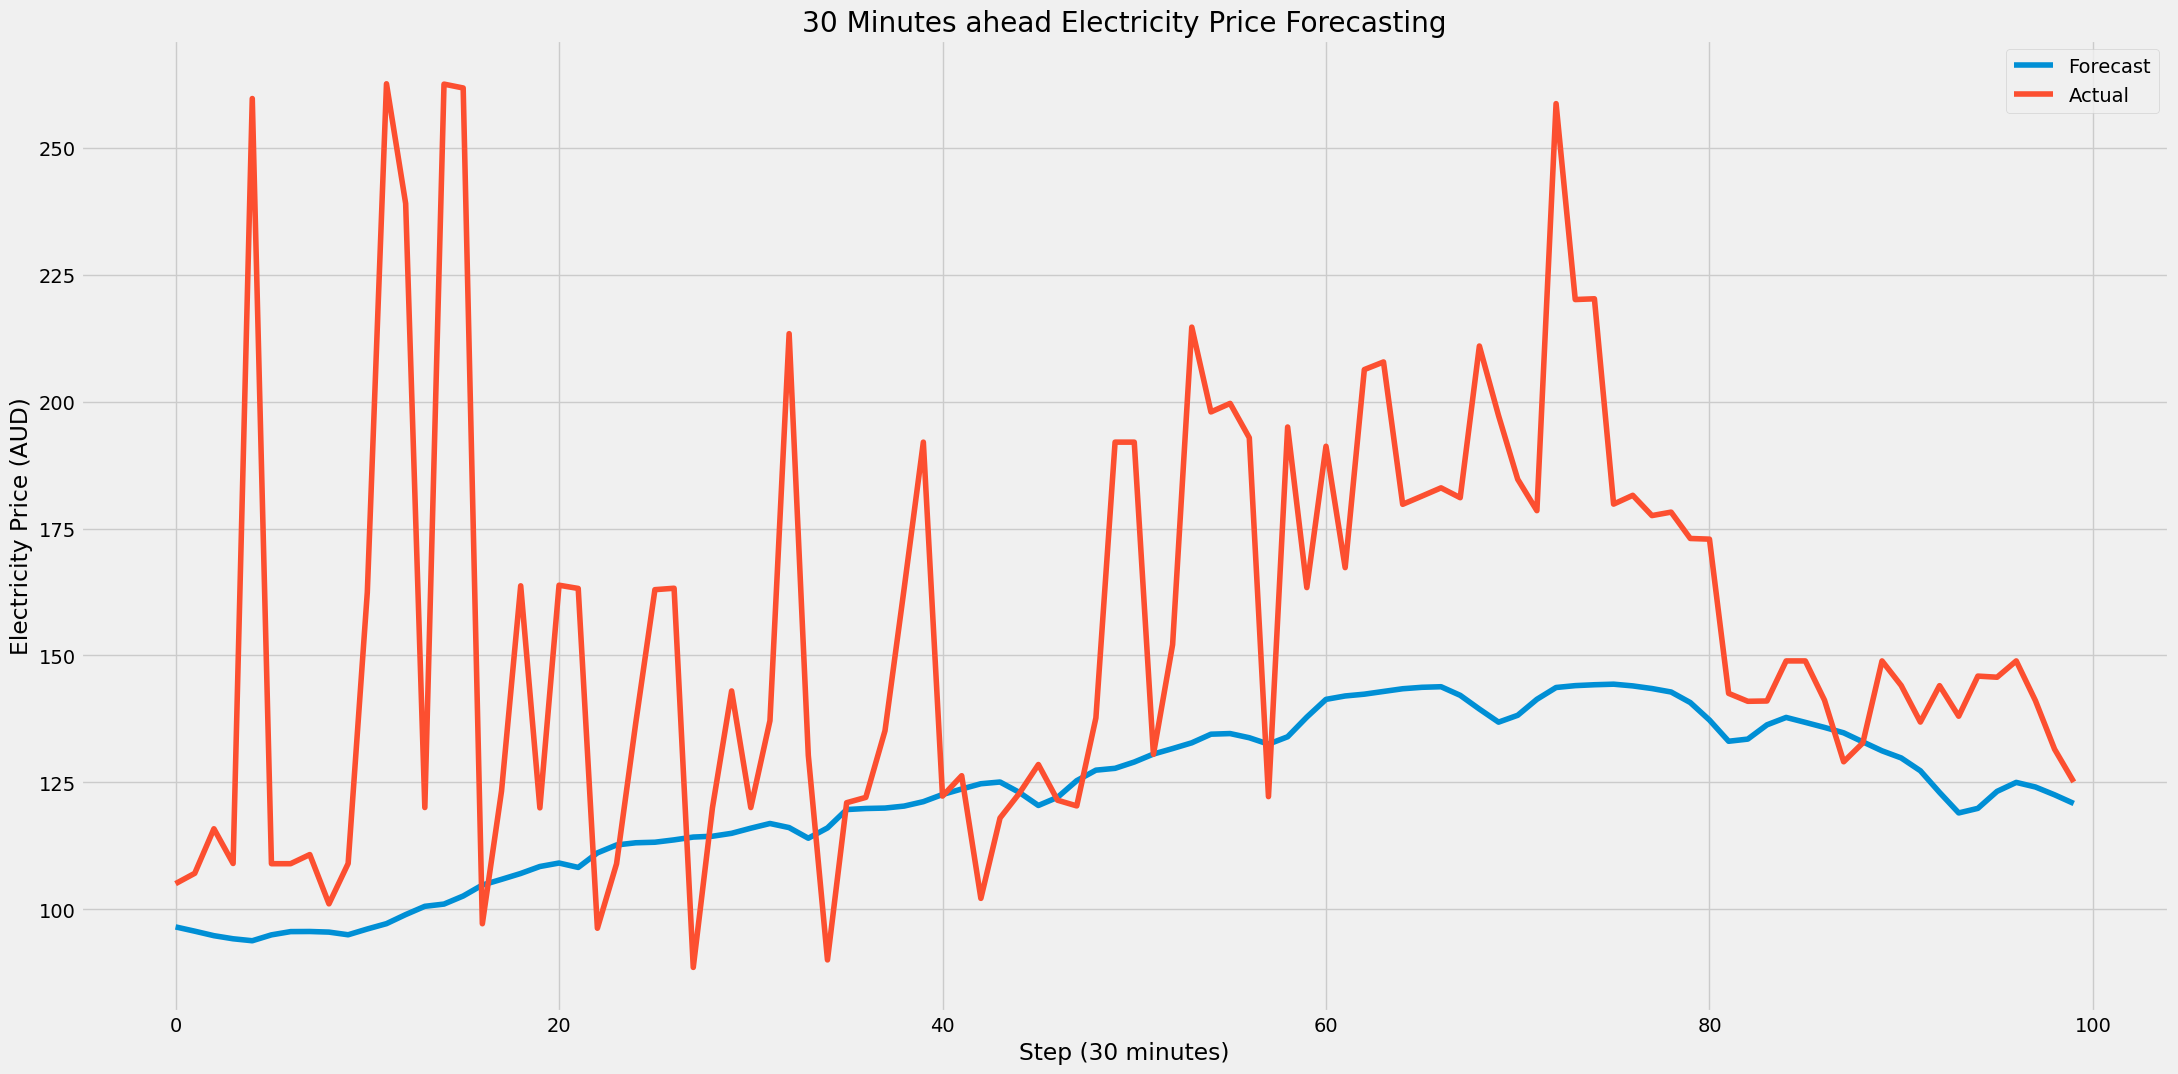

<Figure size 640x480 with 0 Axes>

In [46]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(24,12))
plt.title('30 Minutes ahead Electricity Price Forecasting')
plt.xlabel('Step (30 minutes)')
plt.ylabel('Electricity Price (AUD)')
plt.plot(predictions[350:450])
plt.plot(scaler.inverse_transform(y_test)[350:450])
plt.legend(['Forecast', 'Actual'])
plt.show()
plt.savefig('0 Minutes ahead Electricity Price Forecasting.png')